In [5]:
import torch
from torch import nn

## 全连接层（线性层）

    Linear(in_features=10,out_features=5,bias=True)

In [7]:
'''
构建线性层
'''
tensors=torch.randn(1,10)
FC=nn.Linear(in_features=10,out_features=5)
out=FC(tensors)
print(out)

tensor([[-0.6742, -0.9752,  0.0261,  0.6317,  1.2439]],
       grad_fn=<AddmmBackward>)


In [8]:
'''
查看线性层参数
'''
print(FC.weight)
print('-'*50)
print(FC.bias)

Parameter containing:
tensor([[ 0.1959, -0.0822,  0.2511,  0.0992,  0.1076, -0.0012,  0.1998, -0.1931,
          0.0090, -0.2786],
        [-0.0330,  0.0406,  0.1332,  0.0648,  0.0490, -0.2328, -0.1463, -0.3162,
          0.0432, -0.0892],
        [ 0.2395,  0.0080, -0.1068, -0.0323,  0.0388, -0.0753,  0.2002,  0.1854,
          0.0004,  0.1459],
        [ 0.2084, -0.0427,  0.0542, -0.2229, -0.1118,  0.0859, -0.2867, -0.2730,
         -0.0718,  0.1611],
        [ 0.1130,  0.0161,  0.1389, -0.2665, -0.2975,  0.1965,  0.2140,  0.1537,
          0.2761,  0.0372]], requires_grad=True)
--------------------------------------------------
Parameter containing:
tensor([-0.1621, -0.1351,  0.0204,  0.0352, -0.1390], requires_grad=True)


## 非线性层

## 卷积层

    nn.Conv2d(in_channels,out_channels,kernel_size,stride=1,padding=0,dilation=1,groups=1,bias=True,pading_mode='zeros')

- 功能

    对多个二维信号进行卷积
    
- in_channels

    输入通道数
    
- out_channels

    输出通道数，等价于卷积核个数
    
- kernel_size

    卷积核步长
    
- stride
    
    步长

- padding

    填充个数

- dilation

    空洞卷积大小
    
- groups

    分组卷积设置
    
- bias

    偏置
    
- 卷积层输出大小计算公式

    $$out_{size}=\frac {in_{size}-kernel_{size}}{stride}+1$$

D:/Jupyter/工作准备/pytorch学习/Pytorch基本手册/lena.png
卷积前尺寸:torch.Size([1, 3, 512, 512])
卷积后尺寸:torch.Size([1, 1, 510, 510])


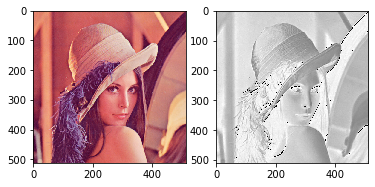

In [5]:
import os
import torch.nn as nn
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt


def transform_invert(img_, transform_train):
    """
    将data 进行反transfrom操作
    :param img_: tensor
    :param transform_train: torchvision.transforms
    :return: PIL image
    """
    if 'Normalize' in str(transform_train):
        norm_transform = list(filter(lambda x: isinstance(x, transforms.Normalize), transform_train.transforms))
        mean = torch.tensor(norm_transform[0].mean, dtype=img_.dtype, device=img_.device)
        std = torch.tensor(norm_transform[0].std, dtype=img_.dtype, device=img_.device)
        img_.mul_(std[:, None, None]).add_(mean[:, None, None])

    img_ = img_.transpose(0, 2).transpose(0, 1)  # C*H*W --> H*W*C
    if 'ToTensor' in str(transform_train):
        img_ = img_.detach().numpy() * 255

    if img_.shape[2] == 3:
        img_ = Image.fromarray(img_.astype('uint8')).convert('RGB')
    elif img_.shape[2] == 1:
        img_ = Image.fromarray(img_.astype('uint8').squeeze())
    else:
        raise Exception("Invalid img shape, expected 1 or 3 in axis 2, but got {}!".format(img_.shape[2]) )

    return img_


# ================================= load img ==================================
path_img = os.path.join("D:/Jupyter/工作准备/pytorch学习/Pytorch基本手册/", "lena.png")
print(path_img)
img = Image.open(path_img).convert('RGB')  # 0~255

# convert to tensor
img_transform = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transform(img)
img_tensor.unsqueeze_(dim=0)  # C*H*W to B*C*H*W

# ================================= create convolution layer ==================================

# ================ 2d

conv_layer = nn.Conv2d(3, 1, 3)  # input:(i, o, size) weights:(o, i , h, w)
nn.init.xavier_normal_(conv_layer.weight.data)

# calculation
img_conv = conv_layer(img_tensor)

# ================================= visualization ==================================
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_conv.shape))
img_conv = transform_invert(img_conv[0, 0:1, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_conv, cmap='gray')
plt.subplot(121).imshow(img_raw)
plt.show()

In [7]:
print(conv_layer.weight)
print(conv_layer.bias)

Parameter containing:
tensor([[[[ 0.3204,  0.2167, -0.1664],
          [ 0.1775, -0.4563,  0.1585],
          [-0.1137,  0.0656, -0.0835]],

         [[ 0.0524, -0.0403,  0.1917],
          [-0.1714, -0.0929, -0.0059],
          [-0.5185, -0.0304,  0.0318]],

         [[-0.1555, -0.3733, -0.1060],
          [ 0.0330,  0.2758, -0.1150],
          [ 0.3450, -0.1147,  0.1148]]]], requires_grad=True)
Parameter containing:
tensor([-0.0190], requires_grad=True)


## 转置卷积

- 主要用来上采样

    ![](./img/zhuanzhijuan.png)

    ![](./img/zhuanzhi.png)
    
- 注意

    称为转置卷积，就是从形状上卷积核是转置的，但是对应的元素并不满足转置

    nn.ConvTranspose2d(in_channels,out_channels,kernel_size,stride=1,padding=0,dilation=1,groups=1,bias=True,pading_mode='zeros')

- 功能

    对多个二维信号进行卷积
    
- in_channels

    输入通道数
    
- out_channels

    输出通道数，等价于卷积核个数
    
- kernel_size

    卷积核步长
    
- stride
    
    步长

- padding

    填充个数

- dilation

    空洞卷积大小
    
- groups

    分组卷积设置
    
- bias

    偏置
    

- 尺寸计算

    $$out_{size}=(in_{size}-1)*stride+kernel_{size}$$

https://www.jianshu.com/p/25f0139637b7

In [ ]:
# ================ transposed
# flag = 1
flag = 0
if flag:
    conv_layer = nn.ConvTranspose2d(3, 1, 3, stride=2)  # input:(i, o, size)
    nn.init.xavier_normal_(conv_layer.weight.data)

    # calculation
    img_conv = conv_layer(img_tensor)

# ================================= visualization ==================================
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_conv.shape))
img_conv = transform_invert(img_conv[0, 0:1, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_conv, cmap='gray')
plt.subplot(121).imshow(img_raw)
plt.show()

## 池化层

    nn.MaxPool2d(kernel_size,stride=None,padding=0,dilation=1,return_indices=False,ceil_mode=False)
    
- 功能

    最大池化层
    
- kernel_size

    池化核尺寸
    
- stride

    步长
    
- dilation
    
    空洞卷积
    
- ceil_mode

    尺寸向上取整
    
- return_indices

    记录池化像素索引